# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16855,BERTRAND CHAFFEE HOSPITAL,330111,NY,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16856,CROWNPOINT HEALTHCARE FACILITY,320062,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16858,GALLUP INDIAN MEDICAL CENTER,320061,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16859,UNIVERSITY OF LOUISVILLE HOSPITAL,180141,KY,READM-30-HIP-KNEE-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
#clean_hospital_read_df =clean_hospital_read_df[clean_hospital_read_df["Measure Name"] != "READM-30-HIP-KNEE-HRRP"]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)

clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/haruto/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


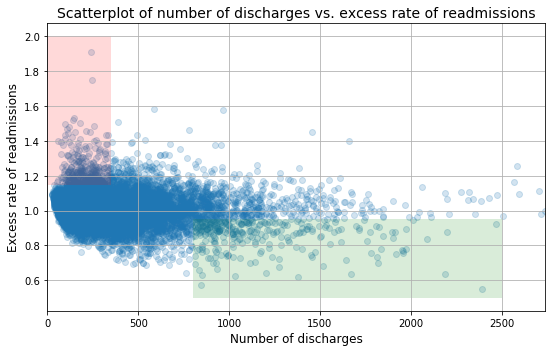

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

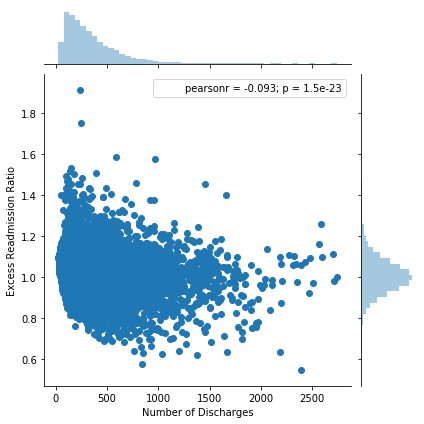

In [7]:
# Non null values of Excess Readmission Ratio and Number of Discharges
nnull_clean_hospital_read_df = clean_hospital_read_df[81:-3]
# Number of Discharges
num_disch = nnull_clean_hospital_read_df["Number of Discharges"]
# Excess Readmission Ratio
ex_read_ratio =nnull_clean_hospital_read_df["Excess Readmission Ratio"]
# Scatter plot and histograms
sns.jointplot(x='Number of Discharges', \
              y='Excess Readmission Ratio'\
              ,data=nnull_clean_hospital_read_df);


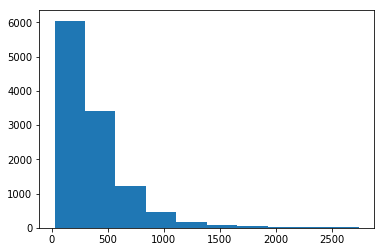

In [8]:
# Histograms of Number of Discharges
plt.hist(num_disch)
plt.show()

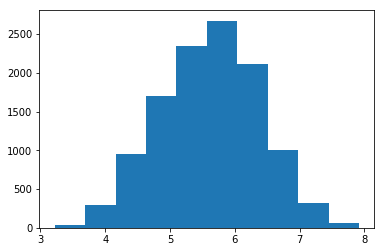

In [10]:
"""
Histograms of log of Number of Discharges. From here we can see 
that Number of Discharges follow approximately a lognormal distribution
"""
plt.hist(np.log(num_disch))
plt.show()

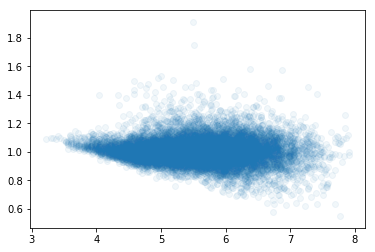

In [12]:
# Scatter plot in the log scale
scaled_num_disch = np.log(num_disch)
plt.scatter(scaled_num_disch,ex_read_ratio,alpha = .06)

In [13]:
# Linear regression

from scipy import stats
slope, intercept, r_value, p_value, \
std_err = stats.linregress(num_disch,ex_read_ratio)
print("r-squared:", r_value**2)
print("slope: {}, intercept: {} , r_value: {}, p_value: {}, std_err: {}".format(slope, intercept, r_value, p_value, std_err))

r-squared: 0.00866678010336
slope: -2.8565052943822634e-05, intercept: 1.017947557954422 , r_value: -0.09309554287590441, p_value: 1.502275642661509e-23, std_err: 2.849824827849989e-06


# Overall, rate of readmissions is trending down with increasing number of discharges.

Here, the slope is -2.8565052943822634e-05, then, the readmission rate is decreasing with the number of discharges. From above we can see that with this linear regression the variation of the Number of Discharges only explain less than 1%(r-squared $\approx 0.009 $) of the variation of the Excess Readmission Ratio. Then, these two variables are weakly correlated. Let us do the same analysis by using hacker statistics methods.

In [14]:
# pearson correlation function(same that stats.linregress[2] )
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute observed correlation: r_obs
r_obs = pearson_r(x, y)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute  measurements: Number of Discharges
    x_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(x_permuted,y)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs )/ len(perm_replicates)
print('p-value is  =', p)

p-value is  = 0.0


Like previous result, this hacker statistics method tell us these two variables are weakly correlated. But, can this small slope(-2.8565052943822634e-05) produce different behavior in the Excess Readmission Ratio between small and big hospitals?

# In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.

In [15]:
#Small hospitals 
less_than_100= nnull_clean_hospital_read_df[nnull_clean_hospital_read_df['Number of Discharges']<100]
print("Mean of Excess Readmission Ratio for small values(<100) is: {}".format(less_than_100['Excess Readmission Ratio'].mean()))
# Percent of cases less than 100
percent_greater_than_1=100.0*np.sum(less_than_100["Excess Readmission Ratio"] >=1)/len(less_than_100["Excess Readmission Ratio"])
print("{}% have excess readmission rate greater than 1".format(percent_greater_than_1))

Mean of Excess Readmission Ratio for small values(<100) is: 1.0226183501683506
63.38383838383838% have excess readmission rate greater than 1


# In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [16]:
# Big hospitals 
more_than_1000= nnull_clean_hospital_read_df[nnull_clean_hospital_read_df['Number of Discharges']>=100]
print("Mean of Excess Readmission Ratio for big values(>1000) is: {}".format(more_than_1000['Excess Readmission Ratio'].mean()))
# Percent of cases more than 1000
percent_greater_than_1=100.0*np.sum(more_than_1000["Excess Readmission Ratio"] >=1)/len(more_than_1000["Excess Readmission Ratio"])
print("{}% have excess readmission rate greater than 1".format(percent_greater_than_1))

Mean of Excess Readmission Ratio for big values(>1000) is: 1.005802901222583
50.41723267999224% have excess readmission rate greater than 1


Is that difference in means statistically significant?

In [18]:
# T-test: two sample means
stats.ttest_ind(less_than_100['Excess Readmission Ratio'], more_than_1000["Excess Readmission Ratio"], equal_var = False)

Ttest_indResult(statistic=8.7379892845311957, pvalue=4.9011769252606233e-18)

The above result tell us this difference in means is statistically significant.

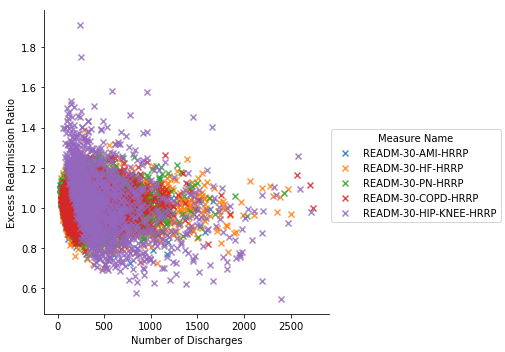

In [19]:
"""
Scatter plot of Number of Discharges vs Excess Readmission Ratio for different
Measure Names.
"""
sns.lmplot(x="Number of Discharges", y="Excess Readmission Ratio", \
           hue="Measure Name",markers = "x",fit_reg=False,data=nnull_clean_hospital_read_df);

# With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red, first plot of this notebook)

From the above plot we can see these datapoints are mainly outliers and they are associated to Measure Name= READM-30-HIP-KNEE-HRRP.

In [20]:
"""
Outliers for Excess Readmission
"""
from scipy.stats import zscore
#threshold defines when a data point is an outlier
threshold = 4
num_disch_zs = zscore(nnull_clean_hospital_read_df["Excess Readmission Ratio"]);
# New column with zscores
nnull_clean_hospital_read_df["zscore_num_disch"] = num_disch_zs;
#  Defining what is not outlier
not_outliers = ~((nnull_clean_hospital_read_df["zscore_num_disch"]\
                  < -threshold) | (nnull_clean_hospital_read_df["zscore_num_disch"] > threshold))

# Filter dataframe by the outliers
df = nnull_clean_hospital_read_df[not_outliers]

/Users/haruto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
#percent of outliers
print("The percent of outliers is "+str(100.0*np.sum(~not_outliers)/len(nnull_clean_hospital_read_df)))

The percent of outliers is 0.426309378806


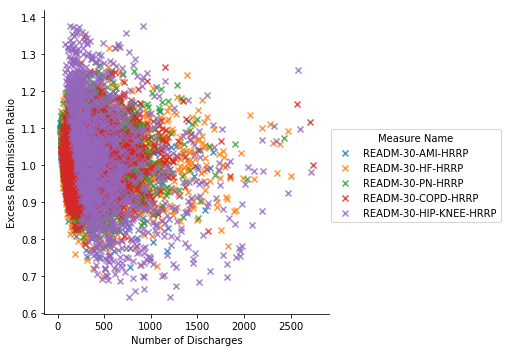

In [22]:
# Scatter plot without outliers
sns.lmplot(x="Number of Discharges", y="Excess Readmission Ratio", \
           hue="Measure Name",markers = "x",fit_reg=False,data=df);

Let's see if the general linear trend is only produced by READM-30-HIP-KNEE-HRRP.

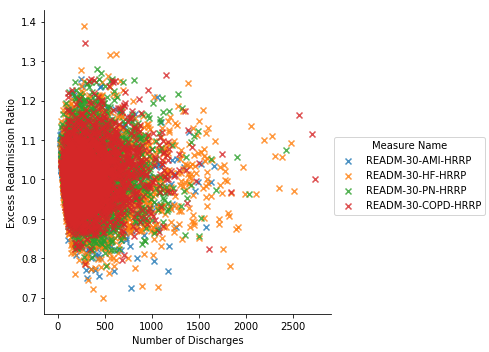

In [23]:
# Redefining our dataframe without READM-30-HIP-KNEE-HRRP
df_without__HIP_KNEE_H =nnull_clean_hospital_read_df[nnull_clean_hospital_read_df["Measure Name"] \
                           != "READM-30-HIP-KNEE-HRRP"]

sns.lmplot(x="Number of Discharges", y="Excess Readmission Ratio", \
           hue="Measure Name",markers = "x",fit_reg=False,data=df_without__HIP_KNEE_H);

In [24]:
# Number of Discharges for the new dataframe
num_disch = df_without__HIP_KNEE_H["Number of Discharges"]
# Excess Readmission Ratio
ex_read_ratio =df_without__HIP_KNEE_H["Excess Readmission Ratio"]

In [25]:
# Linear regression
slope, intercept, r_value, p_value, \
std_err = stats.linregress(num_disch,ex_read_ratio)
print("r-squared:", r_value**2)
print("slope: {}, intercept: {} , r_value: {}, p_value: {}, std_err: {}".format(slope, intercept, r_value, p_value, std_err))

r-squared: 7.63273777811e-05
slope: -2.375332033535452e-06, intercept: 1.005563594143843 , r_value: -0.00873655411367203, p_value: 0.37939746055318024, std_err: 2.7021718230877896e-06


In this test the p-value is high and the r-squared is very small, so, 
We can not say that our variables are linearly correlated. READM-30-HIP-KNEE-HRRP is the one that produces the linear relation between our varaibles. Let explore any differences between small and big hospitals .

In [26]:
#Small hospitals 
less_than_100= df_without__HIP_KNEE_H[df_without__HIP_KNEE_H['Number of Discharges']<100]
print("Mean of Excess Readmission Ratio for small values(<100) is: {}".format(less_than_100['Excess Readmission Ratio'].mean()))
# Percent of cases less than 100
percent_greater_than_1=100.0*np.sum(less_than_100["Excess Readmission Ratio"] >=1)/len(less_than_100["Excess Readmission Ratio"])
print("{}% have excess readmission rate greater than 1".format(percent_greater_than_1))

Mean of Excess Readmission Ratio for small values(<100) is: 1.019427040816327
63.01020408163265% have excess readmission rate greater than 1


In [27]:
# Big hospitals 
more_than_1000= df_without__HIP_KNEE_H[df_without__HIP_KNEE_H['Number of Discharges']>=100]
print("Mean of Excess Readmission Ratio for big values(>1000) is: {}".format(more_than_1000['Excess Readmission Ratio'].mean()))
# Percent of cases more than 1000
percent_greater_than_1=100.0*np.sum(more_than_1000["Excess Readmission Ratio"] >=1)/len(more_than_1000["Excess Readmission Ratio"])
print("{}% have excess readmission rate greater than 1".format(percent_greater_than_1))

Mean of Excess Readmission Ratio for big values(>1000) is: 1.0028246954967008
49.77092412560062% have excess readmission rate greater than 1


Even when our variables are "not" linearly correlated, there is a statistical difference between small and big hospital. Probably there is a non-linear relation between Number of Discharges and Excess Readmission Ratio. With lower number of discharges, there is a greater incidence of excess rate of readmissions and with higher number of discharges, there is a greater incidence of lower rates of readmissions(is not difficult to see that without taking into account the outliers this effect is even stronger). Now, let us try only with READM-30-HIP-KNEE-HRRP. 

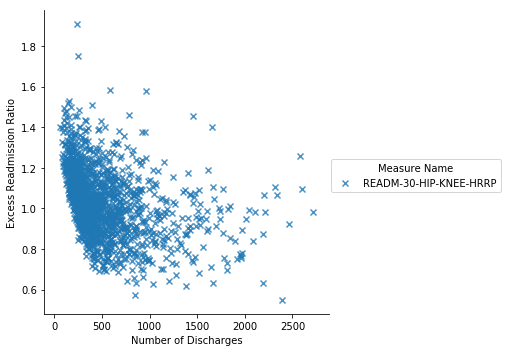

In [29]:
# Redifining our dataframe with only  READM-30-HIP-KNEE-HRRP
df_HIP_KNEE_H =nnull_clean_hospital_read_df[nnull_clean_hospital_read_df["Measure Name"] \
                           == "READM-30-HIP-KNEE-HRRP"]

sns.lmplot(x="Number of Discharges", y="Excess Readmission Ratio", \
           hue="Measure Name",markers = "x",fit_reg=False,data=df_HIP_KNEE_H);

In [30]:
# Number of Discharges when Measure Name = READM-30-HIP-KNEE-HRRP
num_disch = df_HIP_KNEE_H["Number of Discharges"]
# Excess Readmission Ratio
ex_read_ratio =df_HIP_KNEE_H["Excess Readmission Ratio"]

# Linear regression
slope, intercept, r_value, p_value, \
std_err = stats.linregress(num_disch,ex_read_ratio)
print("r-squared:", r_value**2)
print("slope: {}, intercept: {} , r_value: {}, p_value: {}, std_err: {}".format(slope, intercept, r_value, p_value, std_err))

r-squared: 0.130284680138
slope: -0.0001548772348462567, intercept: 1.1110096021876985 , r_value: -0.36094969197690263, p_value: 2.1812166316503994e-43, std_err: 1.08229390690618e-05


From here, we can see  when Measure name = READM-30-HIP-KNEE-HRRP our two variables are linearly correlated.

In [33]:
"""
Small hospitals, in this case there are only 12 
hospitals with Number of Discharges less than 100.
Then, here, we redefine small hospital when Number of Discharges is less than 350
"""
less_than_350= df_HIP_KNEE_H[df_HIP_KNEE_H['Number of Discharges']<350]
print("Mean of Excess Readmission Ratio for small values(<350) is: {}".format(less_than_350['Excess Readmission Ratio'].mean()))
# Percent of cases less than 350
percent_greater_than_1=100.0*np.sum(less_than_350["Excess Readmission Ratio"] >=1)/len(less_than_350["Excess Readmission Ratio"])
print("{}% have excess readmission rate greater than 1".format(percent_greater_than_1))

Mean of Excess Readmission Ratio for small values(<350) is: 1.115259662288929
77.86116322701689% have excess readmission rate greater than 1


In [36]:
# Big hospitals 
more_than_1000= df_HIP_KNEE_H[df_HIP_KNEE_H['Number of Discharges']>=1000]
print("Mean of Excess Readmission Ratio for big values(>1000) is: {}".format(more_than_1000['Excess Readmission Ratio'].mean()))
# Percent of cases more than 1000
percent_greater_than_1=100.0*np.sum(more_than_1000["Excess Readmission Ratio"] >=1)/len(more_than_1000["Excess Readmission Ratio"])
print("{}% have excess readmission rate greater than 1".format(percent_greater_than_1))

Mean of Excess Readmission Ratio for big values(>1000) is: 0.9226556338028171
26.760563380281692% have excess readmission rate greater than 1


**When Measure name = READM-30-HIP-KNEE-HRRP the difference between small and big hospitals is greater.**

# There is a significant correlation between hospital capacity (number of discharges) and readmission rates.



True, but, it is not very strong because our r-squared is very small.

# Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

In our analysis we say that  small 
hospitals = number of discharges less 
than 300, and big hospitals when this number is greater than  1000.
Maybe, sometimes the number of discharges in a big hospital can be small. For more accurate results is necessary to introduce a new variable that clearly defines what is a small and a big hospital. By assuming that only few big hospitals have small number of discharges: smaller hospitals/facilities may be lacking necessary resources to ensure quality care. But,  in the reducing Medicare payments the differences in Measure name should be take into account. 